<a href="https://colab.research.google.com/github/mbsuraj/Social_Network_Analysis/blob/master/Social_Network_Analysis_Framework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import networkx
from operator import itemgetter
import matplotlib.pyplot
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [0]:

# Read the data from amazon-books.csv into amazonBooks dataframe;
filename = r'/gdrive/My Drive/DataMining2/Assignment3/amazon-books.csv'
amazonBooks = pd.read_csv(filename, index_col=0)

In [4]:
amazonBooks.sample(n = 5)

,Id,Title,Categories,SalesRank,TotalReviews,AvgRating,DegreeCentrality,ClusteringCoeff
0060916494,28661,Tell My Horse : Voodoo and Life in Haiti and J...,nonfiction religion biographies zora fiction n...,21739,6,4.5,11,0.145455
034074670X,107596,The Wombles Buggy Trouble,NaN,2335453,0,0.0,0,0.000000
1573248215,227940,Tender Murderers: Women Who Kill,memoirs subjects accounts collins authors spec...,358959,2,3.5,0,0.000000
0833517449,212855,The Magic School Bus at the Waterworks (Magic ...,school early illustrators adventure nature fic...,541889,3,4.5,5,1.000000
0312080735,239590,The Dead (Case Studies in Contemporary Criticism),subjects authors books history z j joyce paper...,106786,3,4.0,4,0.333333


In [0]:
# Read the data from amazon-books-copurchase.adjlist;
# assign it to copurchaseGraph weighted Graph;
# node = ASIN, edge= copurchase, edge weight = category similarity
edgeFile = r'/gdrive/My Drive/DataMining2/Assignment3/amazon-books-copurchase.edgelist'
fhr=open(edgeFile, 'rb')
copurchaseGraph=networkx.read_weighted_edgelist(fhr)
fhr.close()

In [6]:
# Now let's assume a person is considering buying the following book;
# what else can we recommend to them based on copurchase behavior 
# we've seen from other users?
print ("Looking for Recommendations for Customer Purchasing this Book:")
print ("--------------------------------------------------------------")
purchasedAsin = '0805047905'

# Let's first get some metadata associated with this book
print ("ASIN = ", purchasedAsin) 
print ("Title = ", amazonBooks.loc[purchasedAsin,'Title'])
print ("SalesRank = ", amazonBooks.loc[purchasedAsin,'SalesRank'])
print ("TotalReviews = ", amazonBooks.loc[purchasedAsin,'TotalReviews'])
print ("AvgRating = ", amazonBooks.loc[purchasedAsin,'AvgRating'])
print ("DegreeCentrality = ", amazonBooks.loc[purchasedAsin,'DegreeCentrality'])
print ("ClusteringCoeff = ", amazonBooks.loc[purchasedAsin,'ClusteringCoeff'])


Looking for Recommendations for Customer Purchasing this Book:
--------------------------------------------------------------
ASIN =  0805047905
Title =  Brown Bear, Brown Bear, What Do You See?
SalesRank =  171
TotalReviews =  172
AvgRating =  5.0
DegreeCentrality =  216
ClusteringCoeff =  0.01976744186046512


In [0]:
# Now let's look at the ego network associated with purchasedAsin in the
# copurchaseGraph - which is esentially comprised of all the books 
# that have been copurchased with this book in the past
# (1) YOUR CODE HERE: 
#     Get the depth-1 ego network of purchasedAsin from copurchaseGraph,
#     and assign the resulting graph to purchasedAsinEgoGraph.
egoNetwork = networkx.ego_graph(copurchaseGraph, purchasedAsin, radius = 1)
purchasedAsinEgoGraph = networkx.Graph(egoNetwork)


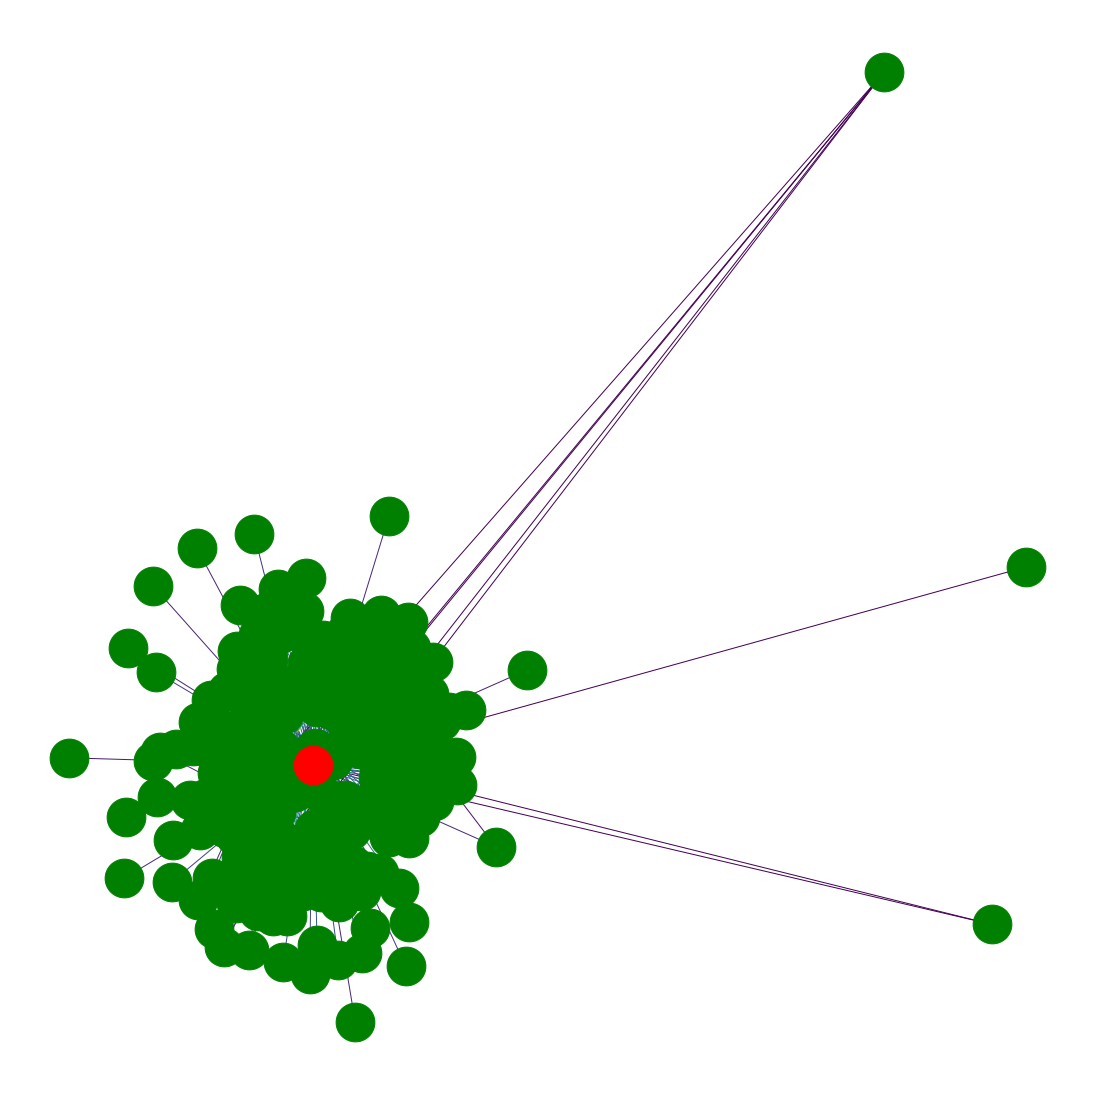

In [28]:
pos = networkx.spring_layout(purchasedAsinEgoGraph) 
plt.figure(figsize = (15, 15)) 
#networkx.draw_networkx_labels(purchasedAsinEgoGraph, pos, font_size = 18) 
edgewidth = [d['weight'] for (u, v, d) in purchasedAsinEgoGraph.edges(data = True)]
networkx.draw(purchasedAsinEgoGraph, pos = pos, node_size = 1500, node_color='g', edge_color= edgewidth, style = 'solid')
networkx.draw_networkx_nodes(purchasedAsinEgoGraph, pos = pos, nodelist= [purchasedAsin], node_color= 'r', node_size = 1500)
plt.show()

In [0]:
# Next, recall that the edge weights in the copurchaseGraph is a measure of
# the similarity between the books connected by the edge. So we can use the 
# island method to only retain those books that are highly simialr to the 
# purchasedAsin
#     Using the island method on purchasedAsinEgoGraph to only retain edges with 
#     threshold >= 0.5, and assign resulting graph to purchasedAsinEgoTrimGraph
threshold = 0.5
GivenNodeIslands = networkx.Graph()
for f, t, e in purchasedAsinEgoGraph.edges(data = True):
  if e['weight'] >= threshold:
    GivenNodeIslands.add_edge(f, t, weight = e['weight'])
purchasedAsinEgoTrimGraph = networkx.Graph(GivenNodeIslands)

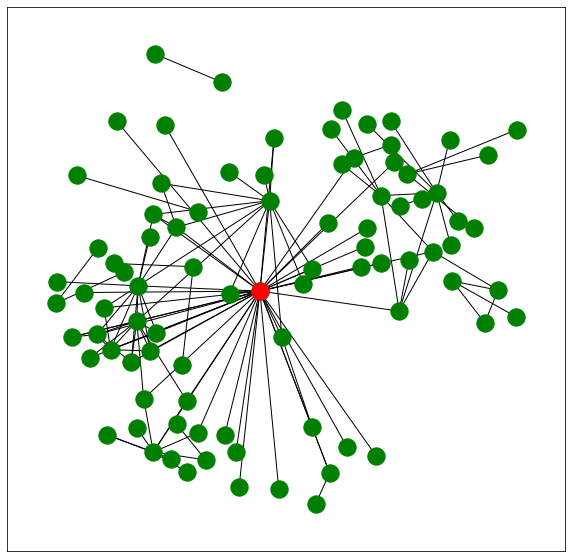

In [30]:
#Looking at the trimmed version using the same pos obtained before.
#pos = networkx.spring_layout(purchasedAsinEgoGraph) 
plt.figure(figsize = (10, 10)) 
#networkx.draw_networkx_labels(purchasedAsinEgoTrimGraph, pos, font_size = 18) 
edgewidth = [d['weight'] for (u, v, d) in purchasedAsinEgoTrimGraph.edges(data = True)]
networkx.draw_networkx_nodes(purchasedAsinEgoTrimGraph, pos = pos, nodelist= networkx.nodes(purchasedAsinEgoTrimGraph), node_color='g') 
networkx.draw_networkx_edges(purchasedAsinEgoTrimGraph, pos = pos, edgelist= purchasedAsinEgoTrimGraph.edges)
networkx.draw_networkx_nodes(purchasedAsinEgoTrimGraph, pos = pos, nodelist= [purchasedAsin], node_color= 'r') #ego node
plt.show()

In [20]:
networkx.number_of_nodes(purchasedAsinEgoTrimGraph)

87

In [0]:
# Next, recall that given the purchasedAsinEgoTrimGraph you constructed above, 
# you can get at the list of nodes connected to the purchasedAsin by a single 
# hop (called the neighbors of the purchasedAsin) 
#     Finding the list of neighbors of the purchasedAsin in the 
#     purchasedAsinEgoTrimGraph, and assign it to purchasedAsinNeighbors

purchasedAsinNeighbors = [n for n in purchasedAsinEgoTrimGraph.neighbors(purchasedAsin)]
#print(purchasedAsinNeighbors)

In [32]:
len(purchasedAsinNeighbors)

41

In [12]:
amazonBooks.head()

,Id,Title,Categories,SalesRank,TotalReviews,AvgRating,DegreeCentrality,ClusteringCoeff
0827229534,1,Patterns of Preaching: A Sermon Sampler,clergy subjects preaching books religion chris...,396585,2,5.0,8,0.464286
0738700797,2,Candlemas: Feast of Flames,subjects religions earth based books religion ...,168596,12,4.5,9,0.583333
0486287785,3,World War II Allied Fighter Planes Trading Cards,hobbies subjects crafts books home garden general,1270652,1,5.0,0,0.000000
0842328327,4,Life Application Bible Commentary: 1 and 2 Tim...,texts study religion reference bibles living s...,631289,1,4.0,6,0.600000
1577943082,5,Prayers That Avail Much for Business: Executive,subjects worship books religion prayerbooks ch...,455160,0,0.0,4,1.000000


In [0]:
# Next, let's pick the Top Five book recommendations from among the 
# purchasedAsinNeighbors based on one or more of the following data of the 
# neighboring nodes: SalesRank, AvgRating, TotalReviews, DegreeCentrality, 
# and ClusteringCoeff

In [13]:
amazonBooks.loc[[purchasedAsin]]
#amazonBooks.loc[purchasedAsinNeighbors]


,Id,Title,Categories,SalesRank,TotalReviews,AvgRating,DegreeCentrality,ClusteringCoeff
0805047905,502784,"Brown Bear, Brown Bear, What Do You See?",illustrators babies specialty music fiction c ...,171,172,5.0,216,0.019767


In [0]:
import seaborn as sns

In [0]:
#First looking at the correlations between the features
amazonBooks.corr()

,Id,SalesRank,TotalReviews,AvgRating,DegreeCentrality,ClusteringCoeff
Id,1.000000,-0.022359,0.006727,0.049340,0.008659,0.012985
SalesRank,-0.022359,1.000000,-0.086067,-0.400589,-0.421039,-0.352381
TotalReviews,0.006727,-0.086067,1.000000,0.088365,0.125763,0.086280
AvgRating,0.049340,-0.400589,0.088365,1.000000,0.249487,0.223247
DegreeCentrality,0.008659,-0.421039,0.125763,0.249487,1.000000,0.180874
ClusteringCoeff,0.012985,-0.352381,0.086280,0.223247,0.180874,1.000000


In [0]:
#It looks like the features are all uncorrelated. So its ideal to take them all for ranking the neighbors

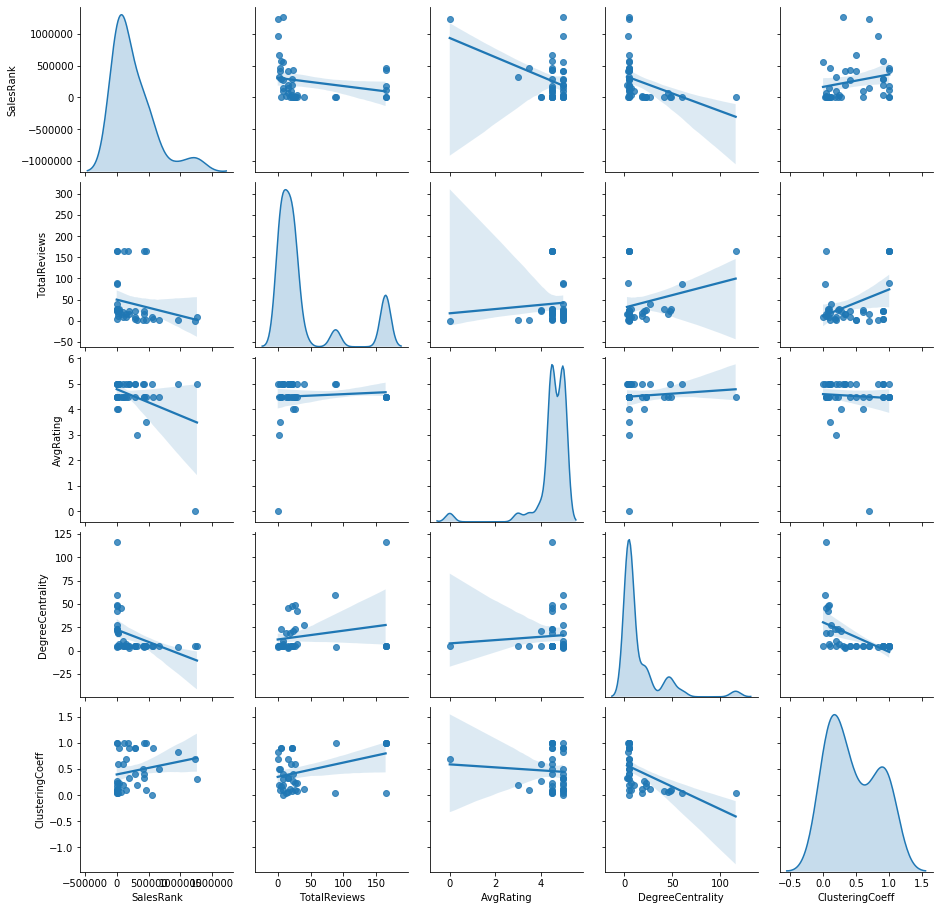

In [0]:
#now looking at the individual plots of the features. we can see that:
distimage = sns.pairplot(amazonBooks.loc[purchasedAsinNeighbors, ['SalesRank', 'TotalReviews', 'AvgRating', 'DegreeCentrality', 'ClusteringCoeff']], kind = 'reg', diag_kind='kde')


In [0]:
#clustering coefficient looks almost normal  - suggesting standard scaler for preprocessing
#Degree Centrality, avg rating and sales rank have outliers on the extremes - suggesting robust scaler for preprocessing
#Total Reviews have values at both the extremes. - i am skipping this feature for now.

In [0]:
#preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

ssFeatures = ['ClusteringCoeff']
ss = StandardScaler(with_mean=True, with_std = True)

rsFeatures = ['SalesRank', 'AvgRating', 'DegreeCentrality']
rs = RobustScaler()

scaler = ColumnTransformer(transformers = 
                                [
                                 ('ss', ss, ssFeatures),
                                 ('rs', rs, rsFeatures)
                                ],
                                remainder = 'drop')
pca = PCA(n_components= 1)
#let's compute composite score by principal component analysis
transformer = Pipeline(steps = 
                       [('sc', scaler),
                        ('pca', pca)
                        ]
                       )
print(transformer)

Pipeline(memory=None,
         steps=[('sc',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('ss',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['ClusteringCoeff']),
                                                 ('rs',
                                                  RobustScaler(copy=True,
                                                               quantile_range=(25.0,
                                                                               75.0),
                                                               with_centering=True,
                    

In [0]:
#Now performing transformation
amazonBooksTransformed = pd.DataFrame(transformer.fit_transform(amazonBooks), index = amazonBooks.index, columns= ['CompositeScore'])
print(amazonBooksTransformed.head())

            CompositeScore
0827229534        1.085957
0738700797        1.568421
0486287785       -1.388133
0842328327        0.780153
1577943082        1.114291


In [0]:
pca.explained_variance_ratio_

array([0.52665385])

In [0]:
pca.components_

array([[ 0.46953742, -0.55371608,  0.1337692 ,  0.67456572]])

In [0]:
import numpy as np


In [0]:
value = np.square(amazonBooks[['ClusteringCoeff', 'SalesRank', 'AvgRating', 'DegreeCentrality']].values - pca.components_)
np.sqrt(np.sum(value, axis = 1))


array([3.96585554e+05, 1.68596554e+05, 1.27065255e+06, ...,
       4.47728458e+00, 4.96611599e+00, 6.62080491e+00])

In [0]:
#Based on the above composite score we can compute the top 5 book recommendations
top5df = amazonBooksTransformed.sort_values(by = 'CompositeScore', ascending=False, axis = 0).head()
top5df.index.name = 'ASIN'
top5df.reset_index(inplace = True)
print(top5df)

         ASIN  CompositeScore
0  0890420254       43.388241
1  1557987912       34.328558
2  0684801523       30.714494
3  0486291138       30.196654
4  0805047905       28.861419


In [0]:
# Print Top 5 recommendations (ASIN, and associated Title, SalesRank, 
# TotalReviews, AvgRating, DegreeCentrality, ClusteringCoeff)
# (5) YOUR CODE HERE: 
reqFeatures =  ['Title', 'SalesRank', 'TotalReviews', 'AvgRating', 'DegreeCentrality', 'ClusteringCoeff']
top5recommendations = pd.merge(top5df[['ASIN']], amazonBooks[reqFeatures], how = 'inner', left_on = 'ASIN', right_index= True)
top5recommendations

,ASIN,Title,SalesRank,TotalReviews,AvgRating,DegreeCentrality,ClusteringCoeff
0,0890420254,Diagnostic and Statistical Manual of Mental Di...,371,35,4.0,324,0.007740
1,1557987912,Publication Manual of the American Psychologic...,143,50,3.5,257,0.002523
2,0684801523,The Great Gatsby,956,934,4.0,230,0.013860
3,0486291138,1001 Most Useful Spanish Words (Beginners' Gui...,290,35,4.5,226,0.019469
4,0805047905,"Brown Bear, Brown Bear, What Do You See?",171,172,5.0,216,0.019767
